# EDA Datos Bancarios

---
## *Descripción de las Columnas

### Columnas tipo `int64`:
1. **id**: Identificador único para cada registro. Es un índice numérico consecutivo.
2. **customer_id**: Identificador único del cliente. Puede ser un número aleatorio.
3. **atm_transfer_in**: Cantidad de transferencias entrantes realizadas en cajeros automáticos.
4. **atm_transfer_out**: Cantidad de transferencias salientes realizadas en cajeros automáticos.
5. **bank_transfer_in**: Cantidad de transferencias entrantes realizadas a través del banco.
6. **bank_transfer_out**: Cantidad de transferencias salientes realizadas a través del banco.
7. **crypto_in**: Cantidad de transacciones entrantes de criptomonedas.
8. **crypto_out**: Cantidad de transacciones salientes de criptomonedas.
9. **complaints**: Número de quejas realizadas por el cliente.
10. **tenure**: Antigüedad del cliente en el sistema (en años o meses).

### Columnas tipo `object`:
1. **name**: Nombre del cliente o entidad asociada.
2. **country**: País de residencia del cliente.
3. **address**: Dirección del cliente, posiblemente una calle o avenida.
4. **job**: Profesión u ocupación del cliente.

### Columna tipo `datetime64[ns]`:
1. **date**: Fecha y hora asociadas al registro. Podría representar la creación del registro, transacción, o cualquier otro evento relevante.

### Columnas tipo `float64`:
1. **bank_transfer_in_volume**: Volumen total de dinero transferido hacia el banco en una operación o serie de operaciones.
2. **bank_transfer_out_volume**: Volumen total de dinero transferido desde el banco en una operación o serie de operaciones.
3. **crypto_in_volume**: Volumen total de criptomonedas recibidas en transacciones.
4. **crypto_out_volume**: Volumen total de criptomonedas enviadas en transacciones.

### Columna tipo `bool`:
1. **from_competitor**: Indicador (`True/False`) de si la transferencia del cliente fue desde un competidor.

---

In [13]:
#Importaciones

#Modulo de sistema
import sys
import os
#Manejo de datos
import pandas as pd
import numpy as np
#Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
#Tratar datos tipo fecha
from datetime import datetime, timedelta
#Estadísticas
import scipy.stats as stats
#Modulos propios para SRC
src_path = "../src/"
sys.path.append(src_path)
import soporte_analisis as sa
import soporte_visualizacion as sv 

In [2]:
#Abror el archivo de datos metodo tradicional
#df = pd.read_parquet('../data/datos_bancarios.parquet')
#df.head()

In [2]:
#Apertura con conexion a SRC, funcion ruta_archivo, preanalisis basico y rapido
ruta_archivo = "../data/datos_bancarios.parquet"
df = sa.preanalisis(ruta_archivo)



--- Resumen de datos ---
El número de filas es: 25000
El número de columnas es: 20
---------
Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        25000 non-null  int64         
 1   customer_id               25000 non-null  int64         
 2   atm_transfer_in           25000 non-null  int64         
 3   atm_transfer_out          25000 non-null  int64         
 4   bank_transfer_in          25000 non-null  int64         
 5   bank_transfer_out         25000 non-null  int64         
 6   crypto_in                 25000 non-null  int64         
 7   crypto_out                25000 non-null  int64         
 8   complaints                25000 non-null  int64         
 9   tenure                    25000 non-null  int64         
 10  name                      2

None



El número de duplicados: 0
Los nulos que tenemos en el conjunto de datos son:


,count,% nulos


Los tipos de las columnas son:


,tipo_dato
id,int64
customer_id,int64
atm_transfer_in,int64
atm_transfer_out,int64
bank_transfer_in,int64
bank_transfer_out,int64
crypto_in,int64
crypto_out,int64
complaints,int64
tenure,int64



Columnas agrupadas por tipo de dato:
- int64: ['id', 'customer_id', 'atm_transfer_in', 'atm_transfer_out', 'bank_transfer_in', 'bank_transfer_out', 'crypto_in', 'crypto_out', 'complaints', 'tenure']
- object: ['name', 'country', 'address', 'job']
- datetime64[ns]: ['date']
- float64: ['bank_transfer_in_volume', 'bank_transfer_out_volume', 'crypto_in_volume', 'crypto_out_volume']
- bool: ['from_competitor']

-------------------------

Columnas que podrían ser booleanas: ['from_competitor']
-----------------


,id,customer_id,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,complaints,tenure,name,country,address,job,date,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,from_competitor
0,1,8270,230,456,970,981,384,280,2,1,Charlie,Germany,789 Blvd,Engineer,2020-01-01 00:00:00,851.811578,1336.398454,451.864547,670.214273,True
1,2,1860,190,332,253,95,54,106,14,1,Alice,Australia,789 Blvd,Doctor,2020-01-01 01:00:00,734.174813,1223.493300,734.511943,498.054390,False
2,3,6390,841,746,745,852,266,190,17,16,Charlie,Germany,456 Ave,Doctor,2020-01-01 02:00:00,959.279746,1466.165857,446.239029,559.504191,False
3,4,6191,935,865,138,356,32,418,10,2,Bob,Canada,456 Ave,Engineer,2020-01-01 03:00:00,1014.238945,1159.614857,675.434824,486.914639,True
4,5,6734,656,15,709,26,453,52,5,7,Charlie,USA,789 Blvd,Engineer,2020-01-01 04:00:00,707.395790,1415.861105,335.734808,414.433331,True


### Descripción de los Datos: 
(resumen copio y pego de la info extraida)

### Columnas:
Columnas agrupadas por tipo de dato:
- int64: ['id', 'customer_id', 'atm_transfer_in', 'atm_transfer_out', 'bank_transfer_in', 'bank_transfer_out', 'crypto_in', 'crypto_out', 'complaints', 'tenure']
- object: ['name', 'country', 'address', 'job']
- datetime64[ns]: ['date']
- float64: ['bank_transfer_in_volume', 'bank_transfer_out_volume', 'crypto_in_volume', 'crypto_out_volume']
- bool: ['from_competitor']
### Filas:
- Duplicados: No tenemos duplicados
### Nulos:
- Nulos: No tenemos nulos

**Los datos parecen estar transformados y limpios**


---
# Establecer el objetivo del EDA
- Análisis general de las transacciones que se han realizado

### Columnas que tal vez no interesen son:
- Nombre
- Dirección


In [ ]:
# Eliminar las columnas innecesarias para el EDA
df.drop(columns=['name', 'address'], inplace=True)
#df.columns


Index(['id', 'customer_id', 'atm_transfer_in', 'atm_transfer_out',
       'bank_transfer_in', 'bank_transfer_out', 'crypto_in', 'crypto_out',
       'complaints', 'tenure', 'country', 'job', 'date',
       'bank_transfer_in_volume', 'bank_transfer_out_volume',
       'crypto_in_volume', 'crypto_out_volume', 'from_competitor'],
      dtype='object')

In [5]:
# Separamos columnas por tipo
categorical_columns = df.select_dtypes(include="O").columns
numerical_columns = df.select_dtypes(include="number").columns



# Análisis de las columnas categóricas

In [ ]:
'''
# Visualización (lo pone predet en SRC)

n_cols = 2  # Número de columnas en los subplots
n_rows = -(-len(categorical_columns) // n_cols)  # Calcular el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5), constrained_layout=True)

# Aplanar el arreglo de ejes para iterar fácilmente
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette="pastel", hue=col)
    axes[i].set_title(f"Bar Plot de {col}")
    axes[i].set_xlabel("Categorías")
    axes[i].set_ylabel("Frecuencia")
    axes[i].tick_params(axis='x', rotation=90)  # Rotar los nombres del eje X

# Ocultar ejes vacíos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()
'''

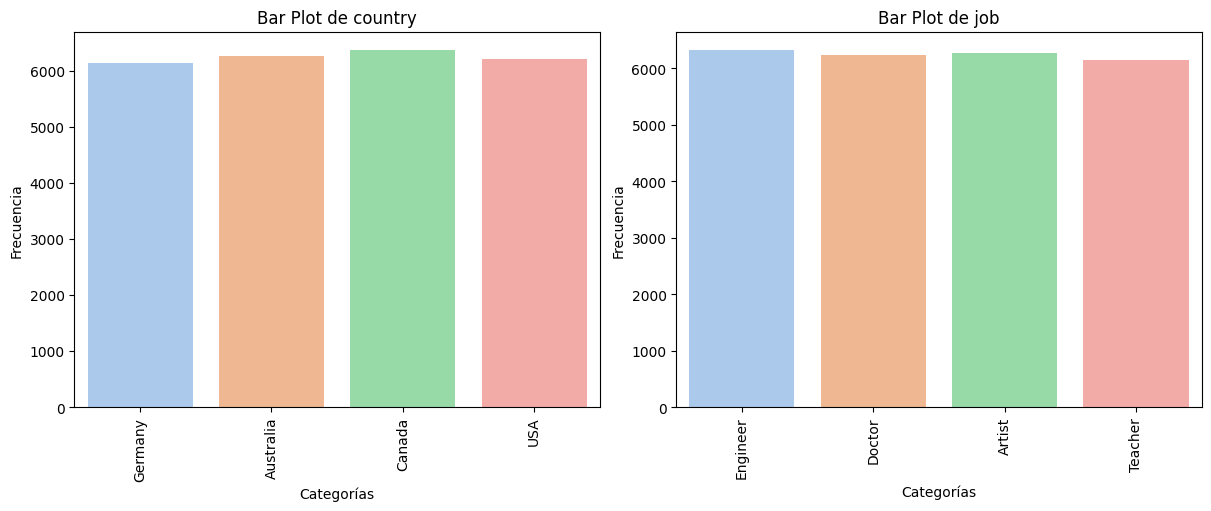

In [ ]:
#Llamada Visualización con SRC (reemplaza lo de arriba)

sv.visualizacion_categoricas(df, categorical_columns)


Los gráficos muestran que la dist de los datos es muy equitativa u homogenea, ninguna se distingue sobre el resto.

In [11]:
# Estadísticos
stats_categoricas = df[categorical_columns].describe().T
stats_categoricas 

,count,unique,top,freq
country,25000,4,Canada,6380
job,25000,4,Engineer,6335


Aqui tenemos que dejar la explicación de nuestro analisis de categóricas

# Analisis de las columnas numericas

In [ ]:
#df["tenure"].value_counts()
#muestra que hay una gran cantidad de clientes con 0 meses, lo que indica que son nuevos clientes.

# Para explicar Visualización de numéricas

tenure
16    1358
9     1357
19    1351
18    1350
7     1348
5     1340
17    1335
6     1335
1     1332
4     1326
2     1325
14    1321
12    1311
3     1311
8     1291
11    1272
15    1261
10    1242
13    1234
Name: count, dtype: int64

In [ ]:
#df["date"].value_counts()
#muestra que son unicas

date
2020-01-01 00:00:00    1
2021-11-24 18:00:00    1
2021-11-25 16:00:00    1
2021-11-25 15:00:00    1
2021-11-25 14:00:00    1
                      ..
2020-12-13 03:00:00    1
2020-12-13 02:00:00    1
2020-12-13 01:00:00    1
2020-12-13 00:00:00    1
2022-11-07 15:00:00    1
Name: count, Length: 25000, dtype: int64

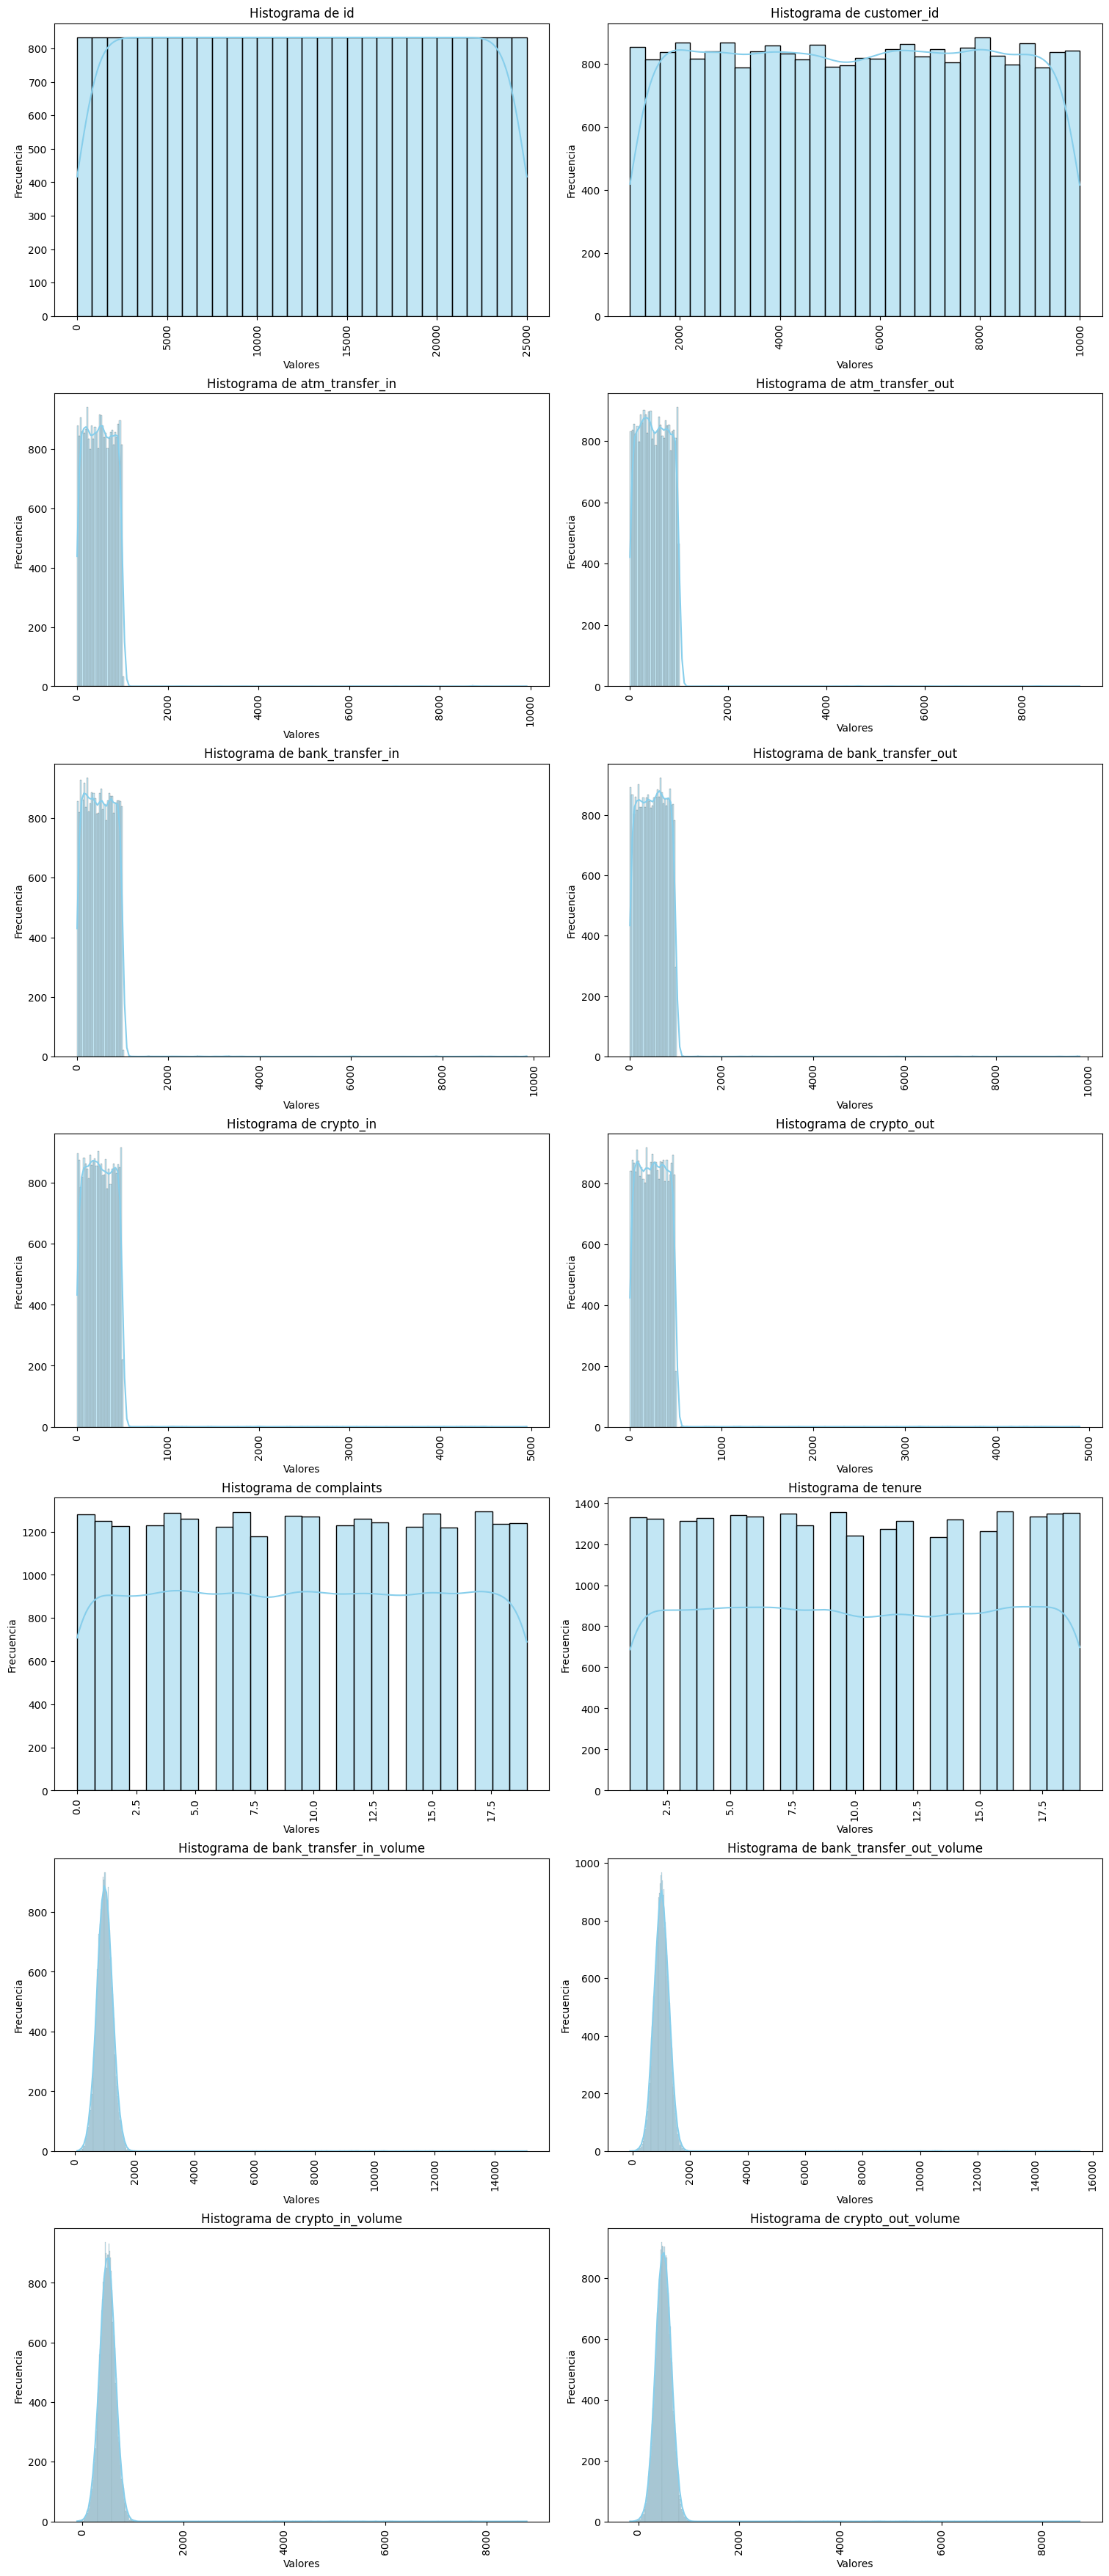

In [ ]:
# Visualización de numéricas

#Comenzamos a ver la distribucion

n_cols = 2  # Número de columnas en los subplots
n_rows = -(-len(numerical_columns) // n_cols)  # Calcular el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5), constrained_layout=True)

# Aplanar el arreglo del ejes para iterar fácilmente
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, color="skyblue")
    axes[i].set_title(f"Histograma de {col}")
    axes[i].set_xlabel("Valores")
    axes[i].set_ylabel("Frecuencia")
    axes[i].tick_params(axis='x', rotation=90)  # Rotar los nombres del eje X

# Ocultar ejes vacíos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()


- Bank y crypto, se ven muchas transacciones por debajo de 1000€ de ahí la concentración. Es una dist de transacciones bastante uniforme.

- Complaints y tenure (meses y años), es una dist de transacciones bastante uniforme.

- Transfers volume, siguen una dist normal.

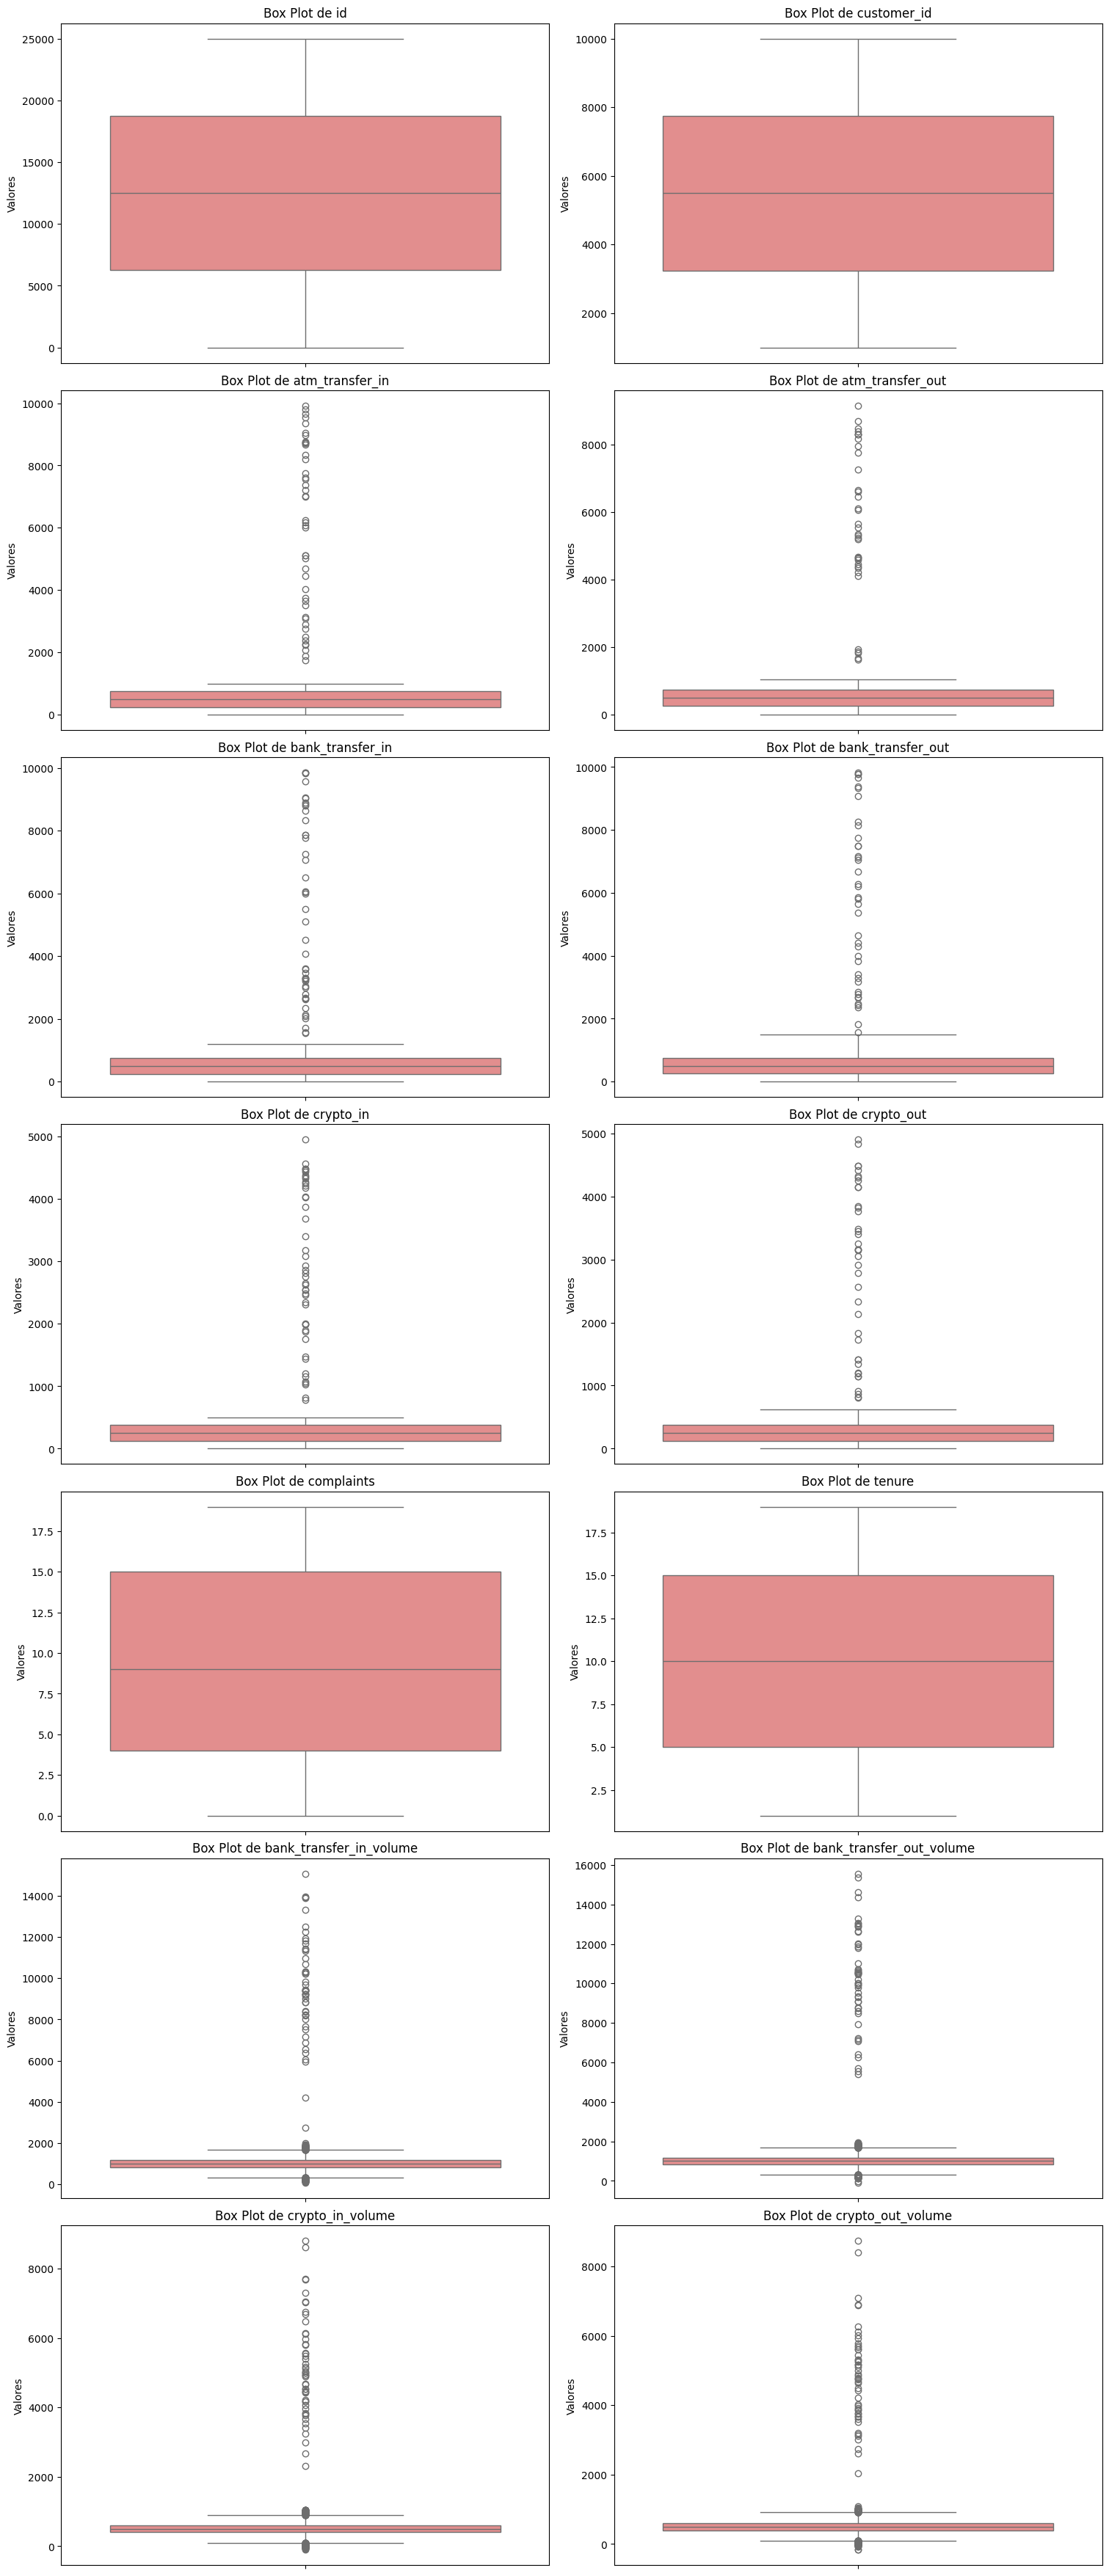

In [19]:
# Boxplot de numéricas, para analizar histograma

# Boxplots
# Configurar subplots en varias filas y columnas
n_cols = 2  # Número de columnas en los subplots
n_rows = -(-len(numerical_columns) // n_cols)  # Calcular el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5), constrained_layout=True)

# Aplanar el arreglo de ejes para iterar fácilmente
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, y=col, ax=axes[i], color="lightcoral")
    axes[i].set_title(f"Box Plot de {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Valores")

# Ocultar ejes vacíos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()


- Hay outlayers en todas las de transacciones, en las otras no.

In [20]:
numerical_stats = df[numerical_columns].describe().T
numerical_stats

,count,mean,std,min,25%,50%,75%,max
id,25000.0,12500.500000,7217.022701,1.000000,6250.750000,12500.500000,18750.250000,25000.000000
customer_id,25000.0,5493.815120,2601.496587,1000.000000,3233.000000,5507.000000,7748.000000,9998.000000
atm_transfer_in,25000.0,507.484400,387.168504,0.000000,245.000000,499.000000,750.000000,9920.000000
atm_transfer_out,25000.0,505.760000,357.883998,0.000000,252.000000,497.000000,748.000000,9160.000000
bank_transfer_in,25000.0,505.912080,372.999995,0.000000,245.000000,498.000000,749.000000,9850.000000
bank_transfer_out,25000.0,507.855240,367.977308,0.000000,250.000000,503.000000,749.000000,9820.000000
crypto_in,25000.0,254.383920,191.529481,0.000000,126.000000,248.000000,376.000000,4950.000000
crypto_out,25000.0,253.046880,183.692694,0.000000,124.000000,250.000000,374.000000,4900.000000
complaints,25000.0,9.489840,5.770756,0.000000,4.000000,9.000000,15.000000,19.000000
tenure,25000.0,9.995720,5.508636,1.000000,5.000000,10.000000,15.000000,19.000000


### Explicación de lo visto en las gráficas

- La mayoría de las variables de transferencias (atm, bank, crypto) presentan distribuciones bastante uniformes, con una concentración de valores en rangos bajos, especialmente por debajo de 1000€, lo que indica que la mayoría de las transacciones son de montos pequeños.
- Las variables `complaints` y `tenure` muestran distribuciones relativamente homogéneas, aunque `tenure` destaca por una gran cantidad de clientes con poca antigüedad, lo que sugiere una base de clientes mayoritariamente nueva.
- Los boxplots revelan la presencia de outliers en todas las variables relacionadas con montos de transacciones, lo cual es esperable en datos financieros donde existen operaciones atípicas de alto valor.
- En general, los volúmenes de transferencias (`bank_transfer_in_volume`, `bank_transfer_out_volume`, `crypto_in_volume`, `crypto_out_volume`) siguen una distribución aproximadamente normal, aunque con colas largas hacia valores altos debido a los outliers.

# Análisis de las columnas de fecha

# Análisis de las columnas booleanas